# nb104: VFE neural layesr

In nb102, we implemented the custom layers and models used in VoxelNet's convolutional middle layers and RPN layer.

In nb103, we implemented the first parts of the Voxel Feature Encoder: Partitioning, grouping, and sampling.

It uses a naive sparse representation (i.e. encoding as (D, H, W, T, 7) rather than (K, T, 7)), and it adds the offsets "live" (as a preprocessing step rather than in a layer. So, nb103 will need to be revisited.

But for now, let's finish connecting nb103 to nb102, by defining our custom layers composing the neural part of the VFE!

In [1]:
import math
import os
import random
import sys
import struct
import warnings

import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K


## 1. Fully connected component 

This network uses a fully-connected component which is a sequential stacking of a linear layer, batchnorm, and relu.

Weights should be 7x16: (7, 16)


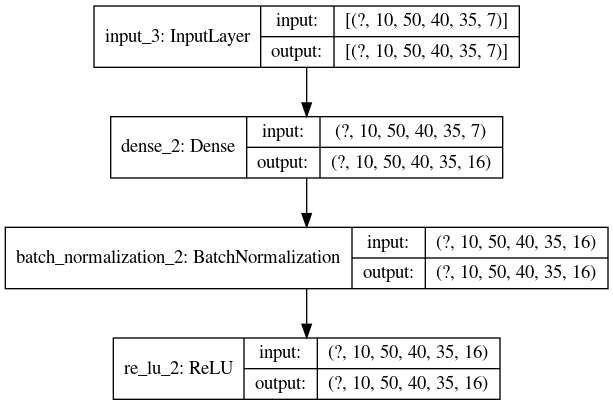

In [11]:
# Play example

# Pretend D, W, H = 10, 50, 40
fcn_input = keras.Input(
    shape = (10, 50, 40, 35, 7)
)
fcn_linear = keras.layers.Dense(16)
fcn_bn = keras.layers.BatchNormalization()
fcn_relu = keras.layers.ReLU()
fcn_out = fcn_relu(fcn_bn(fcn_linear(fcn_input)))

print(f"Weights should be 7x16: {fcn_linear.weights[0].shape}")

fcn = keras.Model(inputs = fcn_input, outputs = fcn_out)

keras.utils.plot_model(fcn, show_shapes=True)

In [12]:
class VFE_FCN:
    '''The fully-connected layer used for the VFE.
    
    :param CC: Dimension of input
    :type CC: int
    :param name: Suffix of names to be given to layers
    :type name: str
    '''
    def __init__(self, CC = 32, name = "VFE_FCN"):
        super(VFE_FCN, self).__init__(name=name)
        
        self.linear = keras.layers.Dense(CC, name = f"{name}_linear")
        self.bn = keras.layers.BatchNormalization(name = f"{name}_bn")
        self.relu = keras.layers.ReLU(name = f"{name}_fcn")
    
    def call(self, xx):
        '''
        :param xx: Input tensor
        :type xx: Tensor
        '''
        return self.relu(self.bn(self.linear(xx)))

## 2. Elementwise Maxpool

It is necessary to maxpool over the $T=35$ dimension, to convert the point-wise features to voxel-wise features.



## 3. VFE layer



In [ ]:
class VFE(keras.layers.Layer):
    '''
    :param cin: Dimensionality of input points
    :type cin: int
    :param cout:  Dimension of output
    :type cout: int    
    '''
    def __init__(
        self,
        cin = 7,
        cout = 32
    ):
        pass
    
    def call(
        self,
        xx
    ):
        '''
        :param :
        :type :
        
        :return:
        :rtype:
        '''
        pass


# VFE Out layer

The paper uses stacked layers, `VFE1(7, 32)` and `VFE2(32, 128)`. 

So, the network is roughly:

1. Input $(10, 400, 352, 35, 7)$
2. `VFE1` outputs $(10, 400, 352, 35, 32)$
3. `VFE2` outputs $(10, 400, 352, 35, 128)$

For the convolutional layers, we need to get rid of the $T=35$, to get input $(10, 400, 352, 128)$.